# Table Creation in MySql and Importing of the same in Jupyter Notebook

As per given project assignment --

Created a table named student_marks in Mysql . 

Choosen the column name and its datatypes accordingly to the students_marks .csv in github

# Installing MySql Connector Python

In [2]:
!pip install mysql-connector-python

# Importing required Library/Module

In [3]:
import mysql.connector

# Connecting Jupyter Notebook with MySql Connector

In [4]:
con=mysql.connector.connect(
     host="localhost",
     port=3306,
     user="root",
     password="Humaira@786",
     database="studdata")

# Importing pandas and numpy libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

# Data Mining

Loading the data of students marks.csv into mysql database by load local infile command . 


Now opening jupyter notebook ,make a connection with mysql ,fetch the data of students marks in

notebook. (This process is known as data mining).

In [6]:
df=pd.read_sql_query("select * from student_marks",con)
df
df.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economy,History,Civics
0,Name,Ge,None,0,0,0,0,0,0,0,0
1,John,M,None,55,45,56,87,21,52,89,65
2,Suresh,M,None,75,96,78,64,90,61,58,2
3,Ramesh,M,None,25,54,89,76,95,87,56,74
4,Jessica,F,None,78,96,86,63,54,89,75,45


# Data Exploratory Analysis

Checking the column names of the data

In [7]:
df.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economy', 'History', 'Civics'],
      dtype='object')

Checking the Datatypes of values of each columns

In [8]:
df.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economy       int64
History       int64
Civics        int64
dtype: object

We can see all columns except 'Name','Gender' and 'DOB' are of integar type .

checking the number of rows and columns in Data

In [9]:
df.shape


(11, 11)

this dataset contains 11 rows and 11 columns

# Checking the Missing Values in Dataset

In [10]:
df.isnull().sum()

Name          0
Gender        0
DOB          11
Maths         0
Physics       0
Chemistry     0
English       0
Biology       0
Economy       0
History       0
Civics        0
dtype: int64

Here it can be observed that 'DOB' column is having all values null.

Now we will drop the column 'DOB'

In [11]:
df.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economy,History,Civics
0,Name,Ge,None,0,0,0,0,0,0,0,0
1,John,M,None,55,45,56,87,21,52,89,65
2,Suresh,M,None,75,96,78,64,90,61,58,2
3,Ramesh,M,None,25,54,89,76,95,87,56,74
4,Jessica,F,None,78,96,86,63,54,89,75,45


# Statistical summary of the Dataset

now lets see the summary of the statistics of the dataset pertaining to the dataset columns, 
like mean,median,mode,standard deviation and IQR values. as the whole dataset is numeric so no 
need to worry for the dropping of any column as below function- --only works on numerical data.

In [12]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economy,History,Civics
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,54.181818,65.727273,68.454545,63.363636,58.818182,66.090909,63.363636,55.000000
std,25.763611,29.315835,26.303474,25.092918,32.195708,25.943996,25.092918,30.179463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.500000,50.000000,58.500000,57.000000,39.500000,57.000000,57.000000,48.500000
50%,55.000000,64.000000,78.000000,64.000000,58.000000,75.000000,64.000000,61.000000
75%,66.500000,91.500000,86.500000,79.500000,84.000000,85.000000,79.500000,75.500000
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.000000


# Checking for outliers in Dataset

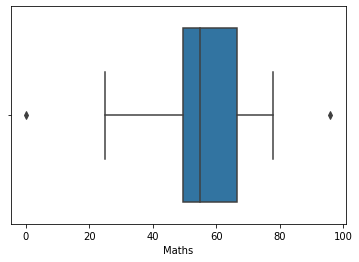

In [13]:
#Maths variable
sns.boxplot(df.Maths)

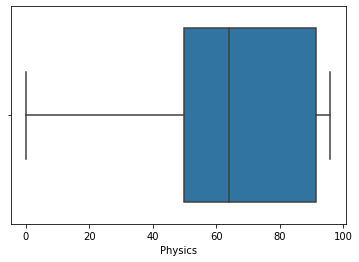

In [14]:
#Physics variable
sns.boxplot(df.Physics)

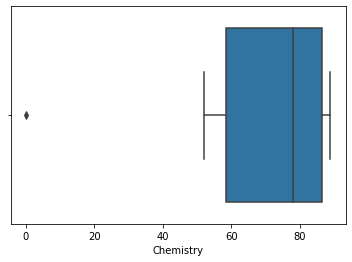

In [15]:
#Chemistry variable
sns.boxplot(df.Chemistry)

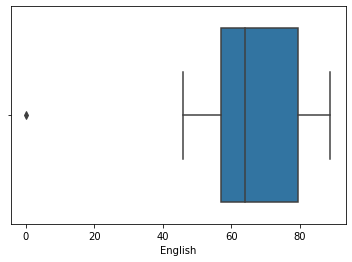

In [16]:
#English Variable
sns.boxplot(df.English)

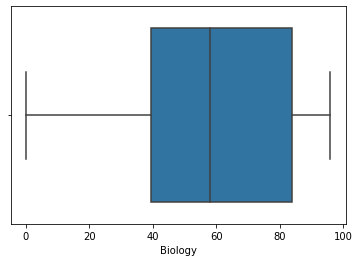

In [17]:
#Biology variable
sns.boxplot(df.Biology)

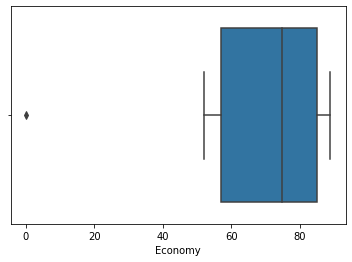

In [18]:
#Economy Variable
sns.boxplot(df.Economy)

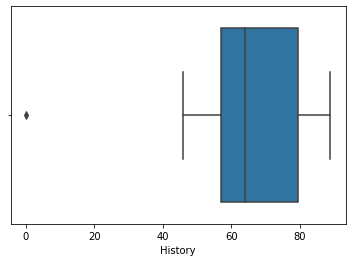

In [19]:
#History variable
sns.boxplot(df.History)

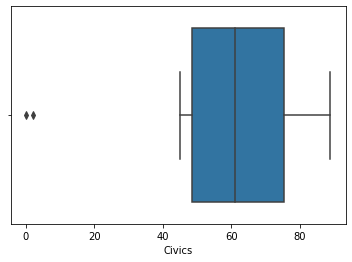

In [20]:
#Civics variable
sns.boxplot(df.Civics)

# Removal of Outliers

Since our Dataset is having only 11 rows.So removing of the rows for removing outliers would not be a 

ideal process as it will reduce the dataset to very small size.Hence we will deal with outliers in 

later part of analysis through scaling technique.

# Checking the Skewness of the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280FFD3F7B8>,
      dtype=object)

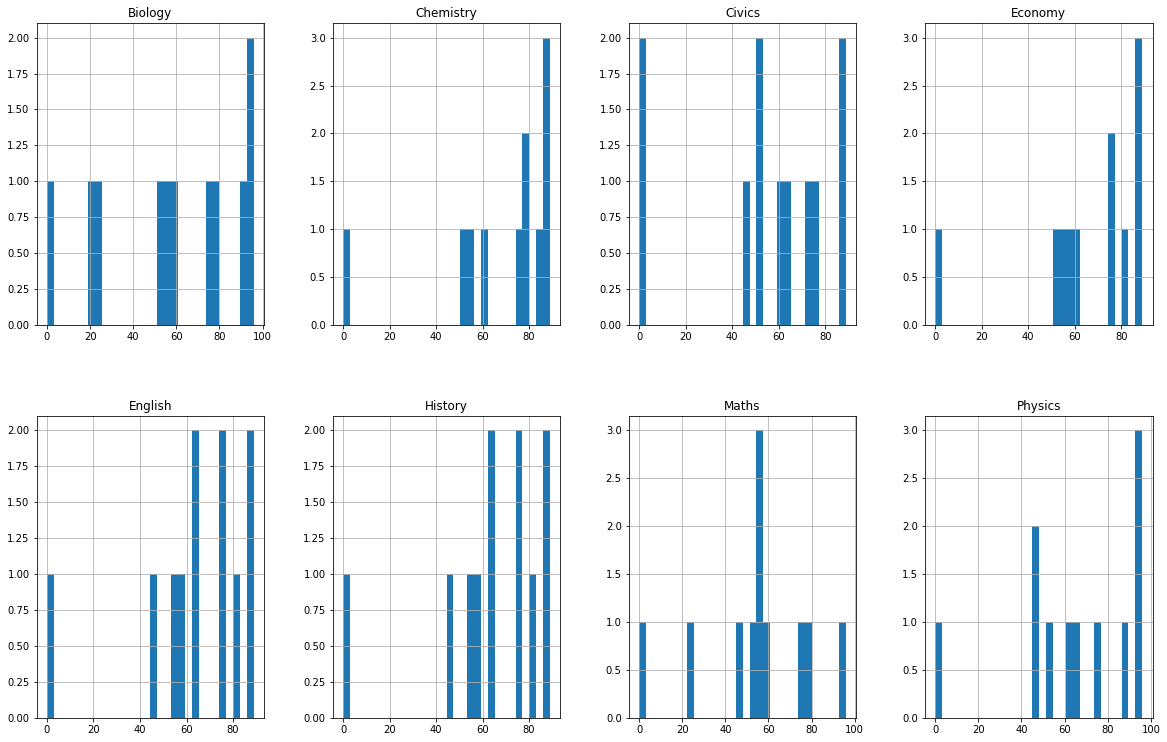

In [21]:
df.hist(figsize=(20,20), grid = True, layout = (3,4), bins = 30)

# Checking the Correlation between Features/variables

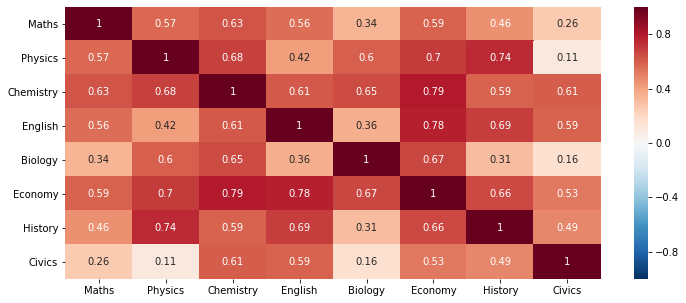

In [22]:
correlation = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [23]:
df.corr()

,Maths,Physics,Chemistry,English,Biology,Economy,History,Civics
Maths,1.000000,0.572971,0.629816,0.559066,0.339052,0.589430,0.458522,0.264812
Physics,0.572971,1.000000,0.681404,0.417212,0.599300,0.696882,0.744826,0.106812
Chemistry,0.629816,0.681404,1.000000,0.609847,0.650747,0.792850,0.589697,0.606557
English,0.559066,0.417212,0.609847,1.000000,0.363632,0.777044,0.689830,0.587489
Biology,0.339052,0.599300,0.650747,0.363632,1.000000,0.669613,0.309169,0.157053
Economy,0.589430,0.696882,0.792850,0.777044,0.669613,1.000000,0.659380,0.529391
History,0.458522,0.744826,0.589697,0.689830,0.309169,0.659380,1.000000,0.485018
Civics,0.264812,0.106812,0.606557,0.587489,0.157053,0.529391,0.485018,1.000000


# Univariate and Bivariate analysis of Dataset

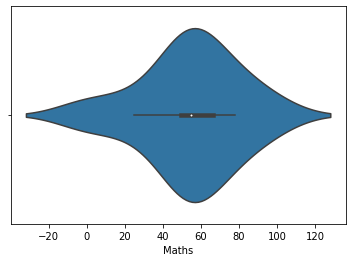

In [24]:
#plotting the graph for visualizing better the distribution of "Maths" variable.
sns.violinplot(x='Maths', data=df)

Maximum marks scored in Maths is aroung 55-70,according to above graph

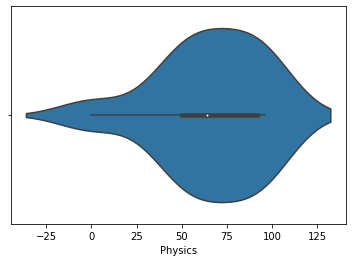

In [25]:
#plotting the graph for visualizing better the distribution of 'Physics' variable
sns.violinplot(x='Physics',data=df)

Maximum marks scored in chemistry is between 50-85,according to above graph

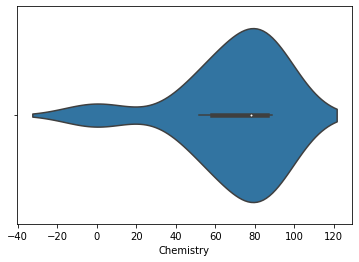

In [26]:
#plotting the graph for visualizing better the distribution of 'Chemistry' variable
sns.violinplot(x='Chemistry',data=df)

From the above chart we can observe that maximum marks students scored on subject Chemistry is around 80

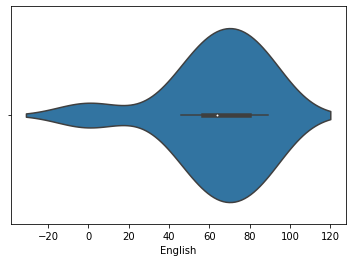

In [27]:
#plotting the graph for visualizing better the distribution of 'English' variable
sns.violinplot(x='English',data=df)

According to above chart,maximum marks scored in english are from 60-80

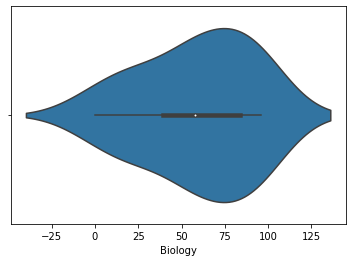

In [28]:
#plotting the graph for visualizing better the distribution of 'Biology' variable
sns.violinplot(x='Biology',data=df)

From above graph we can say that students scored from 50-90 marks

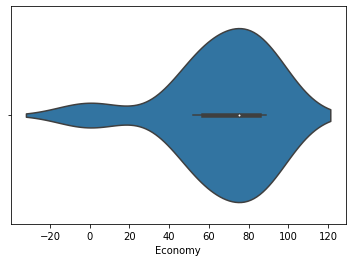

In [29]:
#plotting the graph for visualizing the distribution of 'Economy ' variable better
sns.violinplot(x='Economy',data=df)

From above graph it can be observed that maximum scored marks are between 60-85

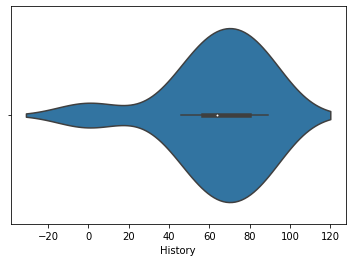

In [30]:
#plotting the graph for visualizing better the distribution of 'History' variable
sns.violinplot(x='History',data=df)

From above graph we can observe that maximum marks scored in History is between 60-80

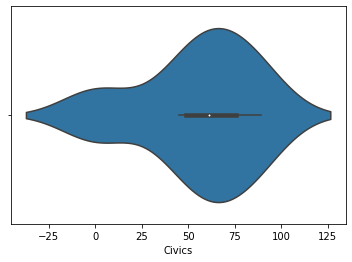

In [31]:
#plotting the chart for 'Civics' variable for visualizing it better
sns.violinplot(x='Civics',data=df)

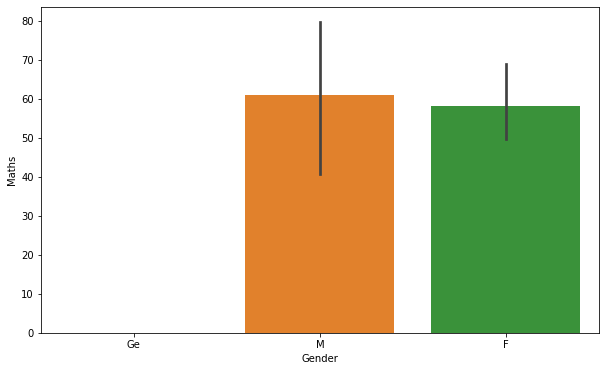

In [32]:
#plotting barplot between 'gender' and 'maths'
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Gender', y = 'Maths', data = df)

In subject Maths Male students scored slightly more than female students

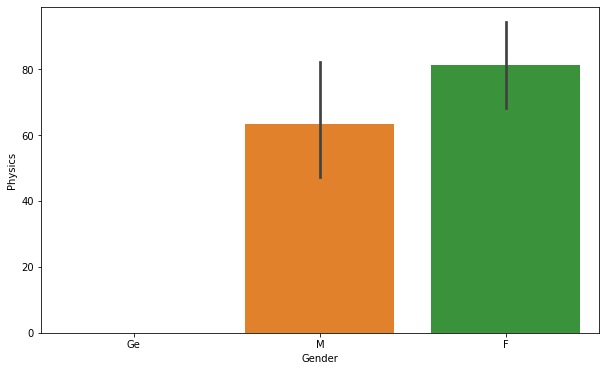

In [33]:
#plotting barplot between 'Gender' and 'Physics'
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Gender', y = 'Physics', data = df)

In subject 'Physics' female students scored more than male students.

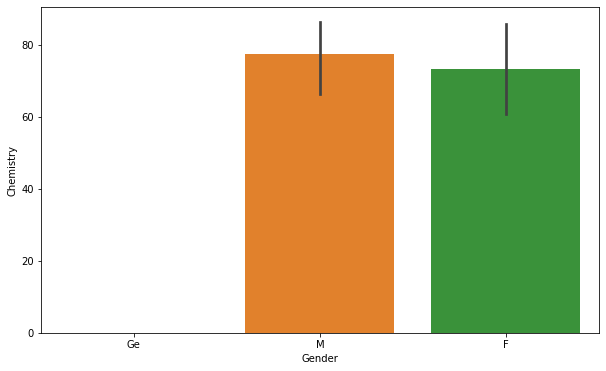

In [34]:
#plotting barplot between 'Gender' and 'Chemistry'
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Gender', y = 'Chemistry', data = df)

In subject 'chemistry' male students scored more than female students.

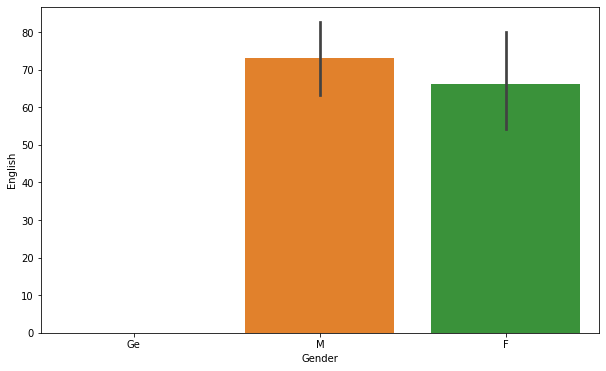

In [35]:
#plotting graph between 'Gender' and 'English'
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Gender', y = 'English', data = df)

In subject 'English' Male students scored more than female students.

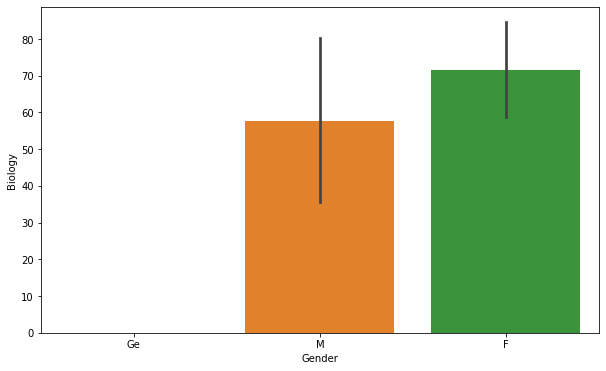

In [36]:
#plotting graph between 'Gender' and 'Biology'
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Gender', y = 'Biology', data = df)

In  Biology subject Female scored slightly more than males.

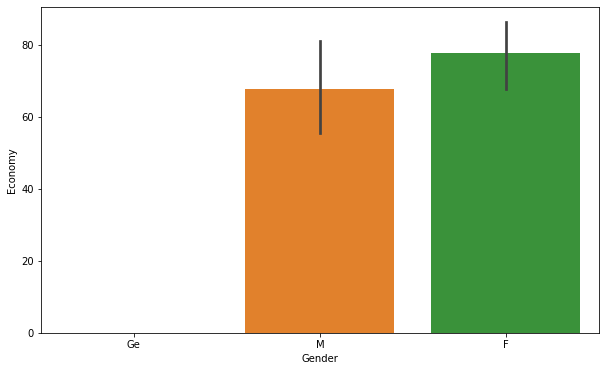

In [37]:
#plotting graph between 'Gender' and 'Economy'
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Gender', y = 'Economy', data = df)

In Economy subject Female students scored slightly more than male students.

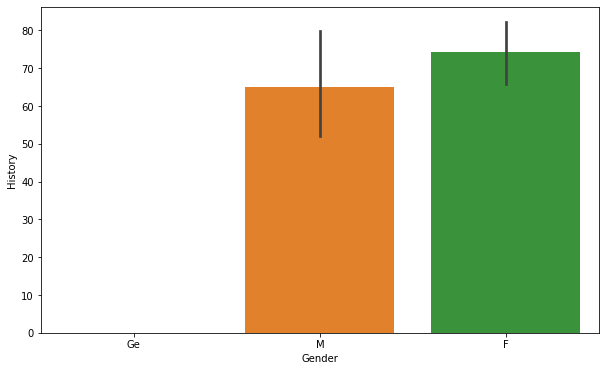

In [38]:
#plotting graph between 'Gender' and 'History'
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Gender', y = 'History', data = df)

In History sunject female students scored slightly more than male students.

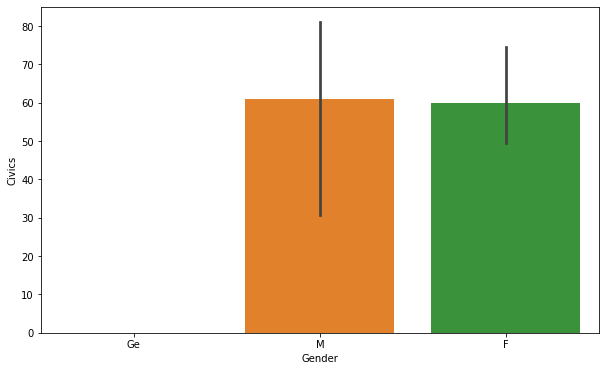

In [39]:
#plotting graph between 'Gender' and 'Civics'
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Gender', y = 'Civics', data = df)

In subject Civics both male and female students have got approximately equal marks

# Label Encoding for 'Gender' Variable

In [40]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [41]:
df['Gender'].value_counts()

2    5
0    5
1    1
Name: Gender, dtype: int64

Here 0== female (5)
     2== Male   (5)

# Data Cleaning

In [44]:
df.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economy', 'History', 'Civics'],
      dtype='object')

We will drop the variable 'Name' as it is of no use in further analysis of the data.

In [45]:
df=df.drop('Name',axis=1)

In [46]:
df.head()

,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economy,History,Civics
0,1,None,0,0,0,0,0,0,0,0
1,2,None,55,45,56,87,21,52,89,65
2,2,None,75,96,78,64,90,61,58,2
3,2,None,25,54,89,76,95,87,56,74
4,0,None,78,96,86,63,54,89,75,45


In [48]:
df=df.drop('DOB',axis=1)

In [49]:
df.head()

,Gender,Maths,Physics,Chemistry,English,Biology,Economy,History,Civics
0,1,0,0,0,0,0,0,0,0
1,2,55,45,56,87,21,52,89,65
2,2,75,96,78,64,90,61,58,2
3,2,25,54,89,76,95,87,56,74
4,0,78,96,86,63,54,89,75,45


Now we have 11 rows and 10 columns

# Data In Tabular Form--Groupby- 'Gender',Values==mean

In [50]:
df.groupby('Gender')[['Maths', 'Physics', 'Chemistry', 'English', 'Biology','Economy', 'History', 'Civics']].mean().sort_values(by = 'Maths',ascending = False)

,Maths,Physics,Chemistry,English,Biology,Economy,History,Civics
Gender,,,,,,,,
2,61.0,63.4,77.4,73.2,57.8,67.8,65.0,61.0
0,58.2,81.2,73.2,66.2,71.6,77.6,74.4,60.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Male===2   /   Female===0



# Conclusion

1. Males are good in Maths ,English subjects.

2. Females are good in Physics,Biology,Economy,History subjects.

3. Both equally performed in subject Civics.

4. Best subject performance including both males and females students is in 'Physics'.

5. Males students scored highest marks in subject 'Chemistry'.

6. Female students scored highest marks in subject 'Physics'.

7. Combined worst score is in subject 'Biology'.

8. Males worst performed in 'Biology'

9. Females worst performed in 'Maths'

10. No student zero marks and full marks in any subject.